# Comparaison des pics observés à JX et JY

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

Cette fonction permet de : 
- Compter le nombre de pics et non-pics pour chaque liste et montrer le graph
- Regarder si il y a une différenec significative entre les deux listes 
- Compter le nombrre de Pics (1) en commun 

In [27]:
def chi_deux_listes_pics(liste1,liste2,ones_list1, ones_list2):
    contingency_table=[[len(liste1), len(liste2)],[ones_list1, ones_list2]]
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        print(" Il y a une différence significative entre les deux listes")
    else: 
        print("Il n'y a pas de différence significative entre les deux listes")

In [28]:
def comparaisons_pics(liste1, liste2):
  #Count the number of 1's and 0's in each list and plot a pie chart
    ones_list1 = liste1.count(1)
    zeros_list1 = liste1.count(0)
    ones_list2 = liste2.count(1)
    zeros_list2 = liste2.count(0)

# plot the distribution of the 1s and 0s in each list
    fig, ax = plt.subplots(1, 2)
    ax[0].pie([ones_list1, zeros_list1 ], labels=['Pic', 'Pas pic'], autopct='%1.2f%%',shadow=True)
    ax[0].set_title('liste1')
    ax[1].pie([ones_list2, zeros_list2], labels=['Pic', 'Pas pic'], autopct='%1.2f%%',shadow=True)
    ax[1].set_title('liste2')
    plt.show()

  #Check if the differences between the two lists are significant
    chi_deux_listes_pics(liste1,liste2,ones_list1, ones_list2)

  #Find the number of 1's in the same position in both lists
    common_ones = 0
    for i in range(len(liste1)):
        if liste1[i] == liste2[i] and liste1[i] == 1:
            common_ones += 1
    print("Le nombre de pics (1) à la même position est :", common_ones)

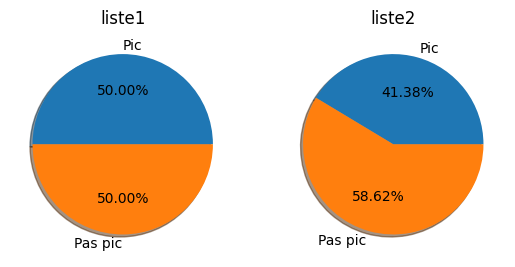

Il n'y a pas de différence significative entre les deux listes
Le nombre de pics (1) à la même position est : 5


In [29]:
comparaisons_pics(liste1, liste2)
liste1 = [1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0]
liste2= [0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,1,0,1,0]